<a target="_blank" href="https://colab.research.google.com/github/phitter-hub/phitter-kernel/blob/main/examples/fit_discrete.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TUTORIAL: ANALYSIS OF PROBABILITY DISTRIBUTION OF GALTON BOAARD'S SIMULATION**

In [1]:
import os
import sys

import numpy

In [2]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../")

In [3]:
import phitter

**Simulate Galton Board Process**

In [4]:
def simulate_galton_board(num_marbles: int, num_levels: int) -> numpy.ndarray:
    positions = numpy.zeros(num_marbles)
    for _ in range(num_levels):
        steps = numpy.random.choice([-0.5, 0.5], size=num_marbles)
        positions += steps
    positions -= positions.min()
    return positions

data = simulate_galton_board(100000, 12)

**Initialize the PHITTER model**

In [5]:
phi = phitter.Phitter(
    data=data,
    fit_type="discrete",
)
phi.fit()

**Get best distribution**

In [6]:
phi.best_distribution

{'id': 'binomial', 'parameters': {'n': 12, 'p': 0.5028013586032182}}

**Summarize**

In [7]:
phi.summarize()

distribution       sse           parameters chi_square kolmogorov_smirnov
0        binomial  0.000022     n: 12, p: 0.5028         ✖️                 ✖️
1  hypergeometric  0.000043  N: 89, K: 36, n: 15         ✖️                 ✖️
2         poisson  0.012716        lambda: 6.005         ✖️                 ✖️
3         uniform  0.084674          a: 0, b: 12         ✖️                 ✖️
4       geometric  0.150568            p: 0.1665         ✖️                 ✖️
5     logarithmic  0.216939             p: 0.946         ✖️                 ✖️

**Get distrbutions sorted by sse**

In [7]:
phi.df_sorted_distributions_sse

distribution passed       sse           parameters     chi_square  \
                                                        test_statistic   
0        binomial     ✖️  0.000015     n: 12, p: 0.5029      20.981950   
1  hypergeometric     ✖️  0.000962  N: 89, K: 37, n: 15    1703.108611   
2         poisson     ✖️  0.012732        lambda: 6.015   15251.071587   
3         uniform     ✖️  0.084587          a: 0, b: 12  109952.800858   
4       geometric     ✖️  0.150421            p: 0.1663  156808.752530   
5     logarithmic     ✖️  0.216941            p: 0.9462            NaN   

                                   kolmogorov_smirnov                 \
  critical_value  p_value rejected     test_statistic critical_value   
0      18.307038  0.02122     True           0.005312       0.004293   
1      16.918978  0.00000     True           0.046038       0.004293   
2      19.675138  0.00000     True           0.092250       0.004293   
3      18.307038  0.00000     True           0.235772       0.004293   
4      19.675138  0.00000     True           0.348522       0.004293   
5            NaN      NaN     None           0.501747       0.004293   

                      
    p_value rejected  
0  0.007055     True  
1  0.000000     True  
2  0.000000     True  
3  0.000000     True  
4  0.000000     True  
5  0.000000     True

**Get parameters by `id_distribution`**

In [8]:
phi.get_parameters("binomial")

{'n': 12, 'p': 0.5028677825516037}

**Get sum squared error by `id_distribution`**

In [9]:
phi.get_sse("binomial")

1.5393165660287706e-05

**Get results kolmogorov smirnov test by `id_distribution`**

In [10]:
phi.get_test_kolmogorov_smirnov("binomial")

{'test_statistic': 0.005312043886559925,
 'critical_value': 0.004293014618329405,
 'p_value': 0.00705527897246816,
 'rejected': True}

**Plot a histogram of the dataset values to visualize the distribution**

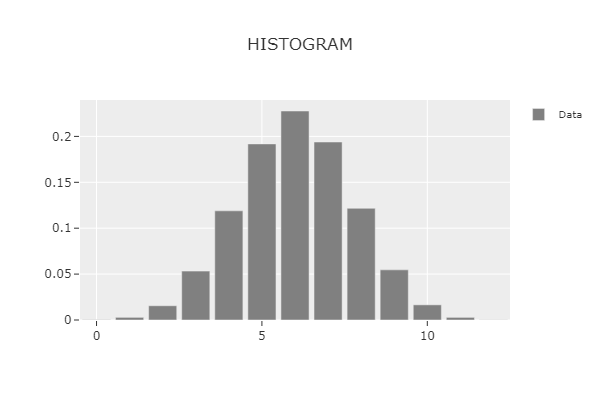

In [11]:
phi.plot_histogram()

**Plot histogram and compare with N distributions**

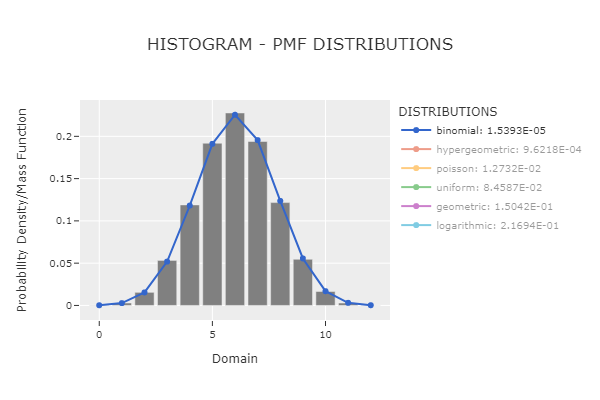

In [12]:
phi.plot_histogram_distributions()

**Plot the histogram along with the `id_distribution` distribution curve for comparison**

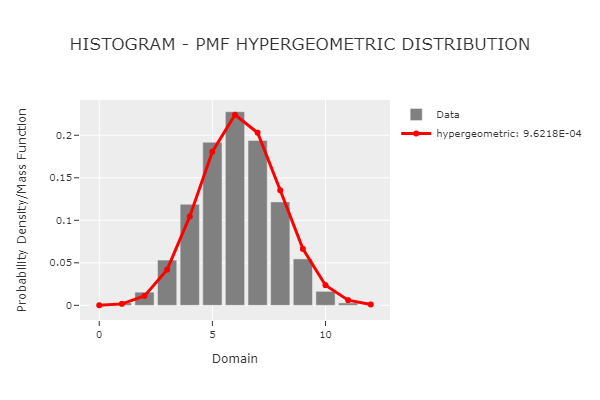

In [13]:
phi.plot_distribution("hypergeometric")

**Generate an empirical cumulative distribution function (ECDF) plot for the data**

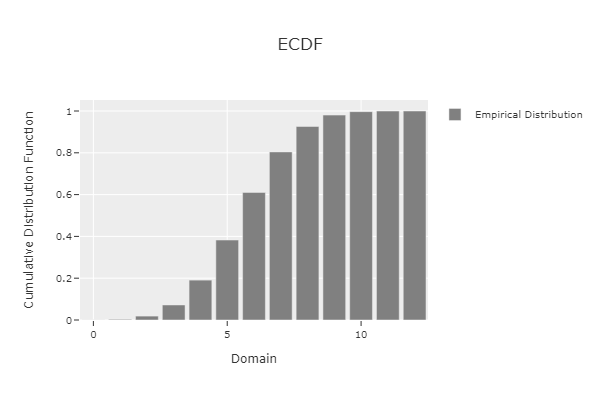

In [14]:
phi.plot_ecdf()

**Plot the ECDF to visualize how closely the dataset values follow a `id_distribution`**

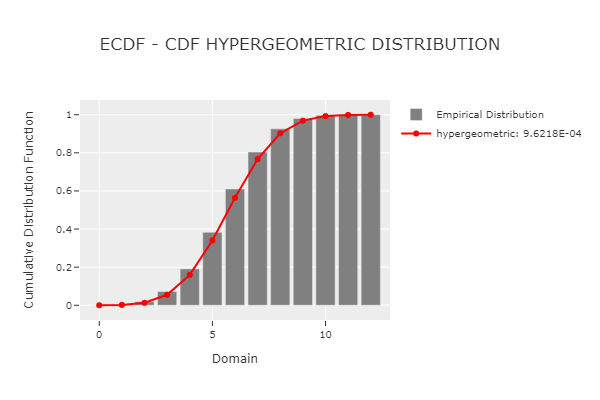

In [15]:
phi.plot_ecdf_distribution("hypergeometric")

**Create a QQ plot for the `id_distribution` to check the quantiles against a `id_distribution`**

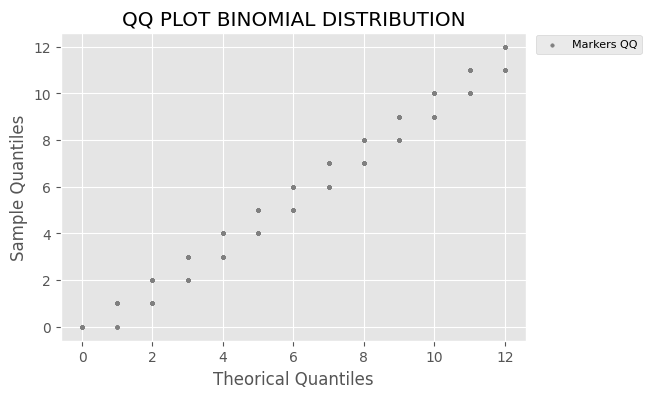

In [16]:
phi.qq_plot("binomial")

**Generate a QQ plot with a regression line for the `id_distribution` to assess normality through quantile comparisons**

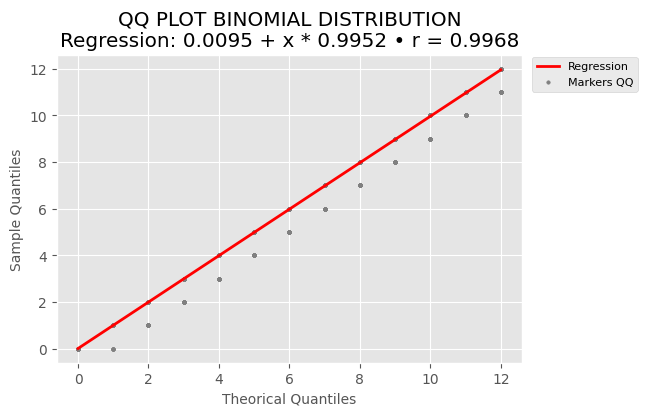

In [17]:
phi.qq_plot_regression("binomial")